# Завдання 1

Побудувати довірчий інтервал для:

a) математичного сподівання a у припущенні, що спостерігаються в.в. ${X_i}$ , які мають нормальний розподіл, але дисперсія $\sigma^2$ невідома;

b) математичного сподівання a у припущенні, що спостерігаються в.в. ${X_i}$,розподіл яких невідомий.

c) дисперсії $\sigma^2$ у припущенні, що спостерігаються в.в. ${X_i}$ , які мають нормальний розподіл.

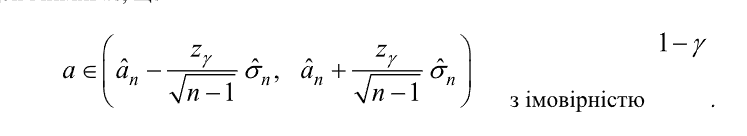

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [19]:

def conf_int(n):
    gama = 0.995
    norm_dist = np.random.randn(n)
    mean = np.mean(norm_dist)
    std_dev = np.std(norm_dist, ddof=1)
    t_critical = stats.t.ppf(gama, n-1)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound
n = [100,10000,1000000]
for i in n:    
    lower_bound, upper_bound = conf_int(i)
    print(f"Довірчий інтервал для {i}: [{lower_bound}, {upper_bound}]")
    print(f"Ширина інтервалу:{upper_bound-lower_bound}")



Довірчий інтервал для 100: [-0.22562645730576142, 0.30835977617770965]
Ширина інтервалу:0.5339862334834711
Довірчий інтервал для 10000: [-0.016899259108793387, 0.03457064823744317]
Ширина інтервалу:0.05146990734623656
Довірчий інтервал для 1000000: [-0.0015956486930363881, 0.003556043319559755]
Ширина інтервалу:0.005151692012596143


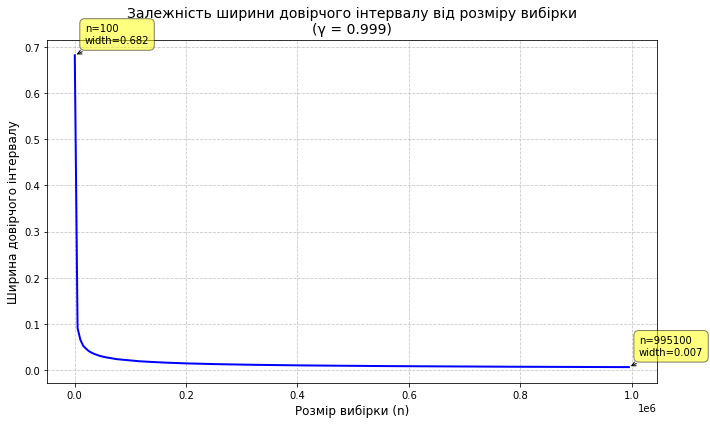

In [17]:

interval_widths = []
gamma = 0.999
n_values = np.arange(100, 1000000, 5000)
for n in n_values:
    sample = np.random.randn(n)
    mean = np.mean(sample)
    std_dev = np.std(sample, ddof=1)
    t_critical = stats.t.ppf((1+gamma)/2, n-1)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    interval_width = 2 * margin_of_error  # Повна ширина інтервалу
    interval_widths.append(interval_width)

# Створення графіку
plt.figure(figsize=(10, 6))
plt.plot(n_values, interval_widths, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Розмір вибірки (n)', fontsize=12)
plt.ylabel('Ширина довірчого інтервалу', fontsize=12)
plt.title(f'Залежність ширини довірчого інтервалу від розміру вибірки\n(γ = {gamma})', fontsize=14)

# Додавання текстових пояснень для деяких точок
for n, width in zip([n_values[0], n_values[-1]], [interval_widths[0], interval_widths[-1]]):
    plt.annotate(f'n={n}\nwidth={width:.3f}', 
                xy=(n, width),
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

In [31]:


def conf_int(n):
    gama = 0.995
    sample = np.random.poisson(20,n)
    mean = np.mean(sample)
    std_dev = np.std(sample, ddof=1)
    t_critical = stats.norm.ppf(gama)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound
n = [100,10000,1000000]
for i in n:    
    lower_bound, upper_bound = conf_int(i)
    print(f"Довірчий інтервал для {i}: [{lower_bound}, {upper_bound}]")
    print(f"Ширина інтервалу:{upper_bound-lower_bound}")


Довірчий інтервал для 100: [19.043075021780695, 21.276924978219306]
Ширина інтервалу:2.233849956438611
Довірчий інтервал для 10000: [19.83213199210098, 20.06086800789902]
Ширина інтервалу:0.2287360157980416
Довірчий інтервал для 1000000: [19.986681969499152, 20.00972403050085]
Ширина інтервалу:0.023042061001696368


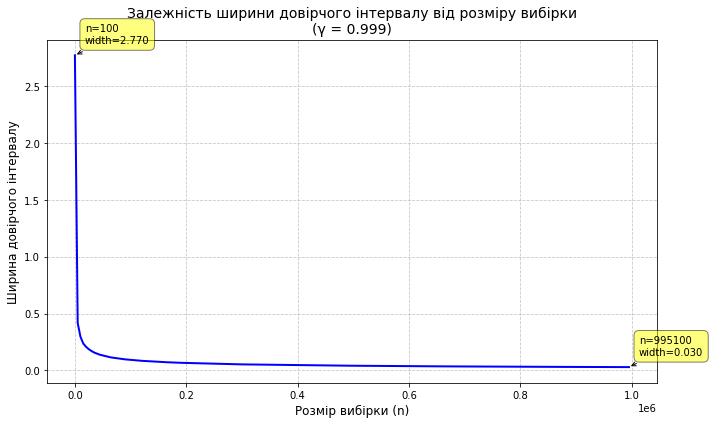

In [32]:
interval_widths = []
gamma = 0.999
n_values = np.arange(100, 1000000, 5000)
for n in n_values:
    sample = np.random.poisson(20,n)
    mean = np.mean(sample)
    std_dev = np.std(sample, ddof=1)
    t_critical = stats.norm.ppf((1+gamma)/2)
    margin_of_error = t_critical * (std_dev / np.sqrt(n))
    interval_width = 2 * margin_of_error  # Повна ширина інтервалу
    interval_widths.append(interval_width)

# Створення графіку
plt.figure(figsize=(10, 6))
plt.plot(n_values, interval_widths, 'b-', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Розмір вибірки (n)', fontsize=12)
plt.ylabel('Ширина довірчого інтервалу', fontsize=12)
plt.title(f'Залежність ширини довірчого інтервалу від розміру вибірки\n(γ = {gamma})', fontsize=14)

# Додавання текстових пояснень для деяких точок
for n, width in zip([n_values[0], n_values[-1]], [interval_widths[0], interval_widths[-1]]):
    plt.annotate(f'n={n}\nwidth={width:.3f}', 
                xy=(n, width),
                xytext=(10, 10),
                textcoords='offset points',
                ha='left',
                va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()